# MMI 701: Multimedia Signal Processing
## Discrete Fourier Transform and Fast Fourier Transforms (FFT)

- Let us first import the modules that we will need to use in the notebook.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import scipy.linalg as splin
import scipy.fftpack as spfft
import time as tm

## Function Definitions

- We first define some functions that we will later use in the notebook.

In [105]:
def circulardelay(x, d):
  return np.roll(x, d) # Numpy has a nice utiliy function roll() that circularly shifts the array

'''Our primitive DFT implementation follows.'''
def dft(x, L):
  N = len(x)
  assert L >= N
  xa = np.append(x, np.zeros(L-N))
  Xa = np.zeros(L, dtype=complex)
  for n in range(L): # We have a nested loop and this is why compşexity is O(N^2)
    for k in range(L):
      Xa[k] += xa[n] * np.exp(-1j * 2 * np.pi / L * k * n)
  return Xa

'''Another implementation uses matrix multiplication using the DFT matrix from scipy.linalg'''
def dftbymatrix(x, L):
    N = len(x)
    assert L >= N
    xa = np.append(x, np.zeros(L-N))
    M = splin.dft(L) # We create a DFT matrix here!
    Xa = np.matmul(M,xa)
    return Xa

## Periodic extension
- Periodic extension is what binds DFT to Fourier series. We will now try to emulate $P$ periods of a signal with a finite time support of $M$ samples

Text(0,0.5,'Amplitude')

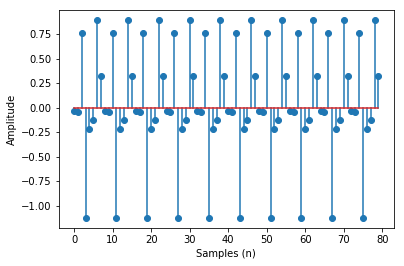

In [92]:
M = 8
P = 10
x = np.random.randn(M)
n = np.arange(0,P * M)
xp = np.tile(x, P) # This is a handy function to repeat 
plt.stem(n,xp[:])
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")

## Time shift

- Time shift is circular for the periodic extension. We will now show that property
- We will first shift a periodic extension by D samples and then show that this corresponds to a circular shift in the signal which was used to obtain the periodic extension
- **Question:** What happens if D>M?

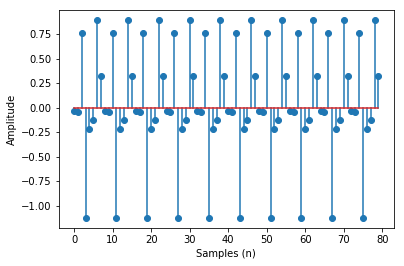

In [93]:
plt.stem(xp)
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
xpshift = circulardelay(xp, 2)
xpsection = xpshift[:8]

- Let us now show that shifting the periodic extension is equivalent to circularly shifting the signal

Text(0,0.5,'Amplitude')

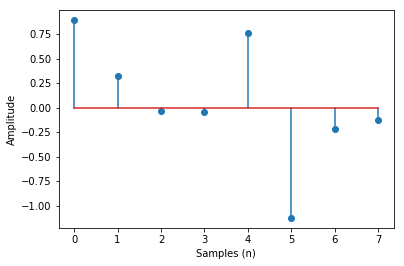

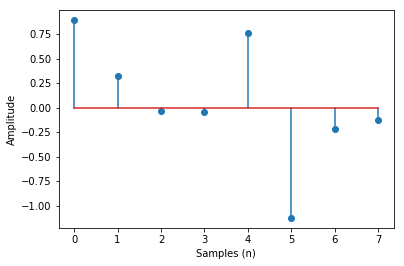

In [94]:
xshift = circulardelay(x, 2)
plt.stem(xshift)
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.figure()
plt.stem(xpsection)
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")


## Effects of windowing on DFT spectrum

- We have seen that windowing a signal will have an effect on its spectrum and while it is possible to use DFT for spectral analysis, it is not the preferred choice.
- We will now generate a linear combination of two sinusoids and demonstrate the effect of different types of filters on the spectrum estimated via DFT.

Text(0,0.5,'Amplitude')

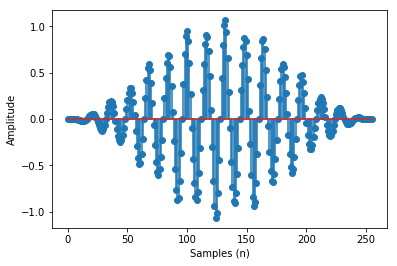

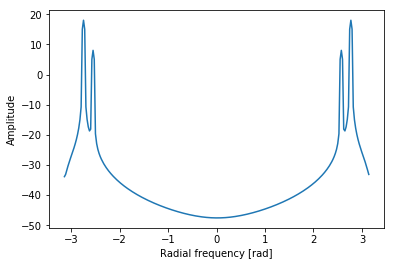

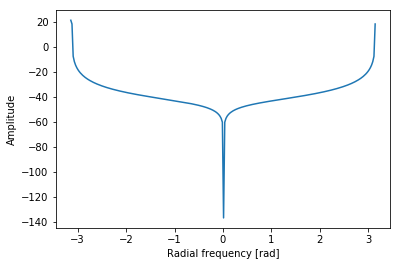

In [95]:
M = 256 # This will be the duration of our signal
n = np.arange(M) # This is the array containing the sample indices
F = 500. # This is the frequency in Hz
Fs = 8000. # This is the sampling frequency in Hz
xsin = np.sin(2 * np.pi * F / Fs * n) + 0.1 * np.sin(2 * np.pi * 1.5 * F / Fs * n) # Let us generate the sinusoids
win = sp.windows.hann(M) # Let us generate the Hann window sequence
plt.stem(xsin * win) # The signal windowed with the Hann window
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(xsin * win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")


Text(0,0.5,'Amplitude')

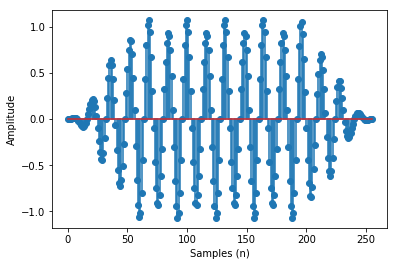

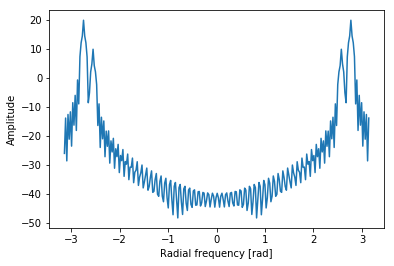

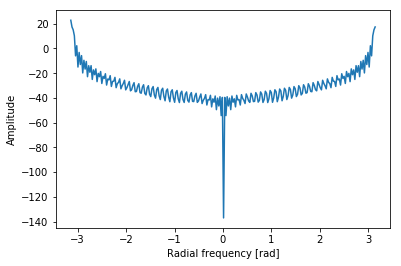

In [96]:
win = sp.windows.tukey(M) # Let us generate the Tukey window sequence
plt.stem(xsin * win) # The signal windowed with the Hann window
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(xsin * win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

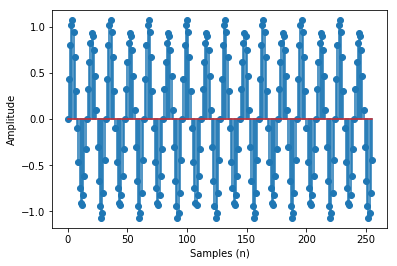

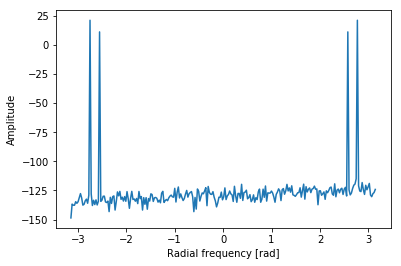

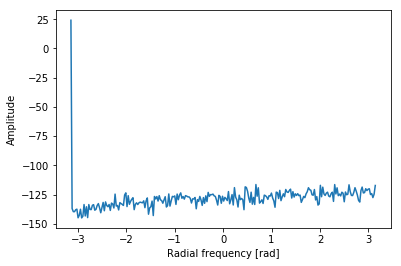

In [97]:
win = sp.windows.boxcar(M) # Let us generate the Tukey window sequence
plt.stem(xsin * win) # The signal windowed with the Hann window
plt.xlabel("Samples (n)")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(xsin * win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")
plt.figure()
plt.plot(np.linspace(-np.pi,np.pi,M), 10*np.log10(np.abs(dft(win, M))))
plt.xlabel("Radial frequency [rad]")
plt.ylabel("Amplitude")

- For this specific case, the rectangular window seems to work the best. However, different windows serve different purposes and are needed in time-frequency analysis of signals.
- For that, constant overlap-add (COLA) conditions have to be satisfied to prevent artefacts. We will not cover that in this course.

## DFT vs. FFT

- Let us now compare the computational efficiency of DFT and FFT
- We will try both the matrix-based DFT and the naive DFT implementation that we implemented for comparing against FFT.
- Note that matrix multiplication using `numpy` would work faster as it uses compiled code as opposed to ournaive implementation which is not optimised
- We will use `scipy.fftpack` module for FFT and `timeit` module for timekeeping
- Albeit using `time` and measuring only once would be somewhat misleading, it would still give us an idea about how long it takes for the three algorithms to run.

In [98]:
nu = np.arange(1,11)
N = 2 ** nu
timedft = []
timedftmat = []
timefft = []
for n in N:
    sig = np.random.randn(n)
    start = tm.time()
    Xa = dft(sig, n)
    end = tm.time()
    timedft.append(end-start)
    start = tm.time()
    Xa = dftbymatrix(sig, n)
    end = tm.time()
    timedftmat.append(end-start)
    start = tm.time()
    Xa = spfft.fft(sig, n)
    end = tm.time()
    timefft.append(end-start)

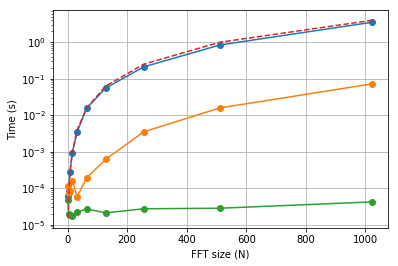

In [108]:
plt.semilogy(N, timedft, 'o-', N, timedftmat, 'o-', N, timefft, 'o-')
plt.xlabel("FFT size (N)")
plt.ylabel("Time (s)")
plt.grid()
plt.plot(N, N**2/512.**2, '--')

- Notice that the time axis is logarithmic!
- You can see that the worst performance is the naive DFT implementation, followed by the matrix-based implementation and then FFT.
- $O(N^2)$ curve normalised with respect to $N=512$ is also shown (dashed red curve)

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics